In [1]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import urllib.request

In [2]:
# Helper method to find the n-day average of a list of numbers
def nDayAverage( n, a ):
    avg = [0]*len(a)
    for i in range(n):
        avg[i] = sum(a[:i+1])/(i+1)
        #print('%d > %.2f' %(i, avg[i]))
    for i in range(n,len(a)):
        avg[i] = sum(a[i-n+1:i+1])/n
        #print('%d >> %.2f' %(i, avg[i]))
    return avg

In [3]:
# Helper method that returns an upper axis bound a multiple
# of 10 just higher than data maximum
def max_axis( mylist ):
    max_val = 0
    for val in mylist:
        try:
            # note: some values in dataset are 'nan'
            if( val > max_val ):
                max_val = val
        except:
            pass
    # massage result:
    max_val = (max_val//10)*10+10
    return max_val

In [4]:
# Dataset location
url = 'https://www.tn.gov/content/dam/tn/health/documents/cedep/novel-coronavirus/datasets/Public-Dataset-County-New.XLSX'
filename = 'tn_cases.xlsx'

In [5]:
# Download excel file from above url and save it locally.  This way we run this any day and access 
# most up-to-date data
urllib.request.urlretrieve(url, 'tn_cases.xlsx')

# convert excel file to pandas dataframe
df = pd.read_excel(filename)

# convert date elements to datetime type
df["DATE"]= pd.to_datetime(df["DATE"]) 

In [9]:
# What county in TN would you like to analyze?
county = "Montgomery"
how_many_days_average_line = 7

county_df = df[df['COUNTY'] == county]
# see last 3 days for sanity check
county_df[['DATE','COUNTY','NEW_CASES']].tail(3)

,DATE,COUNTY,NEW_CASES
8487,2020-06-17,Montgomery,0.0
8584,2020-06-18,Montgomery,15.0
8681,2020-06-19,Montgomery,7.0


Saving result in file named "MontgomeryC19.png"


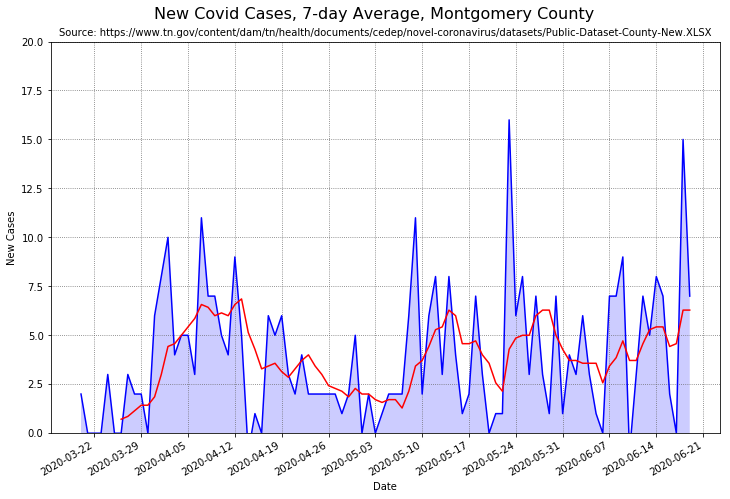

In [10]:
# Extract key data
date = county_df['DATE'].values
newcases = county_df['NEW_CASES'].values
avg = nDayAverage(how_many_days_average_line,newcases)
high = max_axis(newcases)

# Plot the results
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.suptitle('New Covid Cases, %d-day Average, %s County' %(how_many_days_average_line,county), fontsize = 16, y=0.94)
ax.set_title('Source: %s' %(url), fontsize = 10)
plt.plot(date,newcases,'b')
plt.plot(date,avg,'r')
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.fill_between(date, 0, newcases, facecolor='blue', alpha=0.2)
plt.grid(b=True, which='major', color='#666666', linestyle=':')
ax.set_ylim(0,high)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
print('Saving result in file named "%sC19.png"' %(county))
plt.show()
fig.savefig('%sC19.png' %(county), dpi=100)